In [3]:
! /Library/Frameworks/Python.framework/Versions/3.9/bin/python3.9 -m pip install --upgrade pip

  Using cached pip-21.0.1-py3-none-any.whl (1.5 MB)
  Attempting uninstall: pip
    Found existing installation: pip 21.0
    Uninstalling pip-21.0:
      Successfully uninstalled pip-21.0


In [10]:
! pip3 install qiskit

In [20]:
! pip3 install qiskit-terra[visualization]

zsh:1: no matches found: qiskit-terra[visualization]


In [19]:
! pip3 install matplotlib
! pip3 install pylatexenc

In [2]:
import numpy as np
import pandas as pd
import math
import pylatexenc
import matplotlib.pyplot as plt
import qiskit as q
from qiskit import Aer, QuantumCircuit, QuantumRegister, ClassicalRegister, execute, assemble
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

%matplotlib inline

# Weapons Playground

This is a document meant to test weapon mechanics as it applies to the implementation of the quantum circuit(or circuits). Try not to split one weapon test into too many blocks unless the quantum state and circuit need to be checked at multiple points. This just helps to avoid clutter and better separate each individual mechanic or weapon. Labels at the top of each test will help as well.

Initial thoughts:

    - so far, quantum circuit can only be run once it is completely constructed
    - game loop will most likely build the circuit and results will be shown when it is run at the end
    


## Adding X gate to circuit at runtime

using an extremely simplified game loop

The goal of the X-gate is basically to make the two entangled cubits disagree as much as possible (i.e. having |01> or |10> corresponts to a point of damage because the qubits disagree and a |00> and |11> state correspont to a point of health because the qubits agree)

current questions:

    - execution doesn't seem to work (fixed: method was result() not results())
    
notes:

    - adding one CX gate practically halves the health of the opposing player
    - so it turns out a simple X gate is basically a tacticle nuke
    

kill or no?: no
kill or no?: no
kill or no?: no
kill or no?: no
kill or no?: no
513


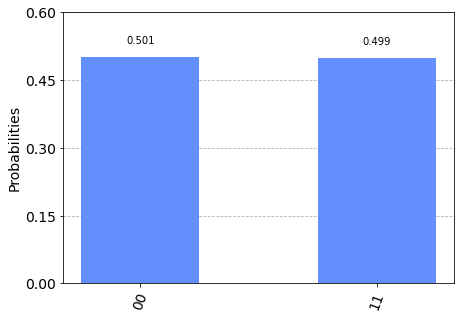

In [4]:
def MakeBellPair(qc, bit1, bit2):
    qc.h(bit1)
    qc.cx(bit1, bit2)

#create turn iterator and backend
turns = 0

backend = Aer.get_backend('qasm_simulator')

#create quantum circut and classical register
shipQc = QuantumCircuit(2)
classReg = ClassicalRegister(1)

MakeBellPair(shipQc, 0, 1)

# simple game loop
while turns < 5:
    choice = input("kill or no?: ")
    if choice == "kill":
        shipQc.cx(0, 1)
    
    turns += 1
        
shipQc.measure_all()
        
# shipQc.draw()

statusResult = execute(shipQc, backend=backend, shots=1000).result()
shipStatus = statusResult.get_counts()
plot_histogram(shipStatus)